In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_file='./sample behavioral cloning data/driving_log.csv'

In [3]:
log_df=pd.DataFrame.from_csv(log_file,index_col=None)

In [4]:
log_df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [5]:
log_df.shape

(8036, 7)

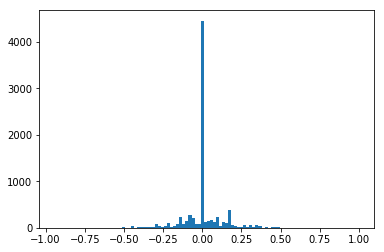

In [6]:
plt.hist(log_df['steering'],bins=100)
plt.show()

IMG/center_2016_12_01_13_43_32_268.jpg
(160, 320, 3)
The dimension of images:160,320, 3


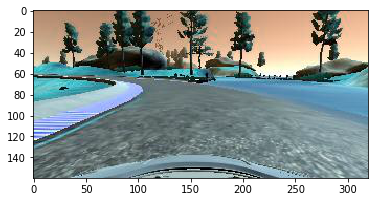

In [7]:
import cv2
import os
img_dir='./sample behavioral cloning data/'

rand_idx=np.random.randint(log_df.shape[0])

c_file=log_df.iloc[rand_idx,:]['center']
print(c_file)
img=cv2.imread(os.path.join(img_dir,c_file))
plt.imshow(img)

print(img.shape)
print("The dimension of images:%s,%s, %s"%img.shape)

### Count the number of images that 'steering' is zero

In [8]:
log_df.loc[log_df["steering"]==0,:].shape

(4361, 7)

In [9]:
from sklearn.utils import resample
sampled_index,sampled_steering=resample(log_df.index,log_df['steering'].values,n_samples=1000)

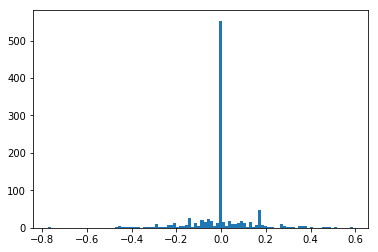

In [10]:
plt.hist(sampled_steering,bins=100)
plt.show()

### Resize the image

In [55]:
import tensorflow as tf

In [60]:
p_ch, p_row, p_col = 3, 224, 224
#p_ch, p_row, p_col = 3, 160, 320
img_placeholder = tf.placeholder("uint8", (None, 160, 320, 3))
single_img_placeholder=tf.placeholder("uint8",(160,320,3))
resize_op = tf.image.resize_image_with_crop_or_pad(single_img_placeholder, p_row, p_col)

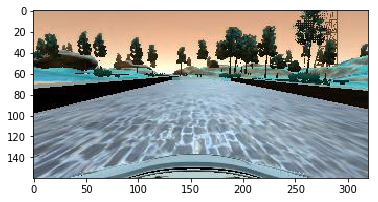

In [51]:
sample_image_file='./sample behavioral cloning data/IMG/center_2016_12_01_13_30_48_287.jpg'
img=np.zeros((1,160,320,3))
temp_img=cv2.imread(sample_image_file)
img[0]=temp_img
plt.imshow(temp_img)
img=img.astype('uint8')

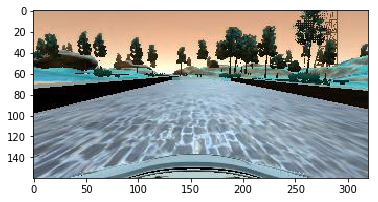

In [52]:
plt.imshow(img[0])

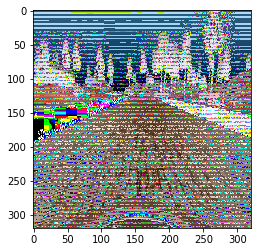

In [49]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={img_placeholder:img})
    plt.imshow(resized_img[0])

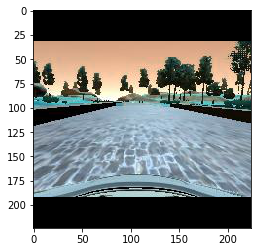

In [63]:
with tf.Session() as sess:
    resized_img=sess.run(resize_op,feed_dict={single_img_placeholder:temp_img})
    plt.imshow(resized_img)

NameError: name 'resize_img' is not defined